#                                    --> PIPELINE PROJECT <--

In [1]:
# importar modulos necesarios

import pandas as pd
import numpy as np
import re

1. Acquisition

In [2]:
# cargar el dataset elegido

avocados = pd.read_csv('avocado.csv')

avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocados.shape

(18249, 14)

2. Wrangling

In [4]:
# comprobar los datos nulos del data set

avocados.isnull().sum()  # No hay nulos en ninguna columna

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
avocados.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
# Comprobar que no hay duplicados
before = len(avocados)

select_columns = ['Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']

avocados = avocados[select_columns].drop_duplicates()

after = len(avocados)

print('Numero de registros duplicados: ', str(before - after))


Numero de registros duplicados:  0


In [7]:
# Extraer el mes de la columna fecha y desechar el resto

month = []
for e in avocados["Date"]:
    aux= e.split("-")
    month.append(aux[1])
    
avocados['month'] = pd.Series(month, index=avocados.index) # Añadir columna Month al dataframe


In [8]:
# Cambio del orden de las columnas

column_order = ['region','year','month','type','AveragePrice','Total Volume','4046','4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

avocados = avocados[column_order]

In [9]:
# comprobar el tipo de datos de las columnas. cambiar year a objeto

avocados['year'] = avocados['year'].astype('object') 

In [10]:
# renombrar algunas columnas

avocados.columns = ['Region','Year','Month','Variety','Avg Price','Total Volume',
                    'S-M size','L size','XL size','Total Bags','S bags','L bags','XL bags']
avocados.head()

,Region,Year,Month,Variety,Avg Price,Total Volume,S-M size,L size,XL size,Total Bags,S bags,L bags,XL bags
0,Albany,2015,12,conventional,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,Albany,2015,12,conventional,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,Albany,2015,12,conventional,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,Albany,2015,12,conventional,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,Albany,2015,11,conventional,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [11]:
# Guardo un csv con los datos manipulados

avocados.to_csv('manipulated_avocados.csv',index=False)

3.Analysis

HIPÓTESIS:
- La variedad de aguacate convencional tendrá un precio medio inferior al aguacate orgánico.
- Las regiones donde el precio medio sea más alto presentarán un volument total de venta menor
- El % que aporten al volumen total (aguacates S-M, aguacates L, aguacares XL y bolsas (mezcla tamaños) tendrán relación con el precio medio.


In [12]:
# Dado que del año 2018 solo hay registros hasta marzo voy a eliminar esos datos
filteredyear = list(avocados[(avocados['Year']==2018)].index) 
avocados = avocados.drop(filteredyear, axis=0)

# Las regiones vienen reflejadas todas juntas de varias maneras: Total US, grandes regiones y por estados.
# Voy a separar en 3 dataframe: Uno de regiones, otro del total y otro de ciudades

avocados_region = avocados[(avocados['Region'] == 'Plains')|(avocados['Region'] =='West')|
                    (avocados['Region'] =='California')|(avocados['Region'] =='SouthCentral')|
                    (avocados['Region'] =='Northeast')|(avocados['Region'] =='Southeast')|
                    (avocados['Region'] =='GreatLakes')|(avocados['Region'] =='Midsouth')]
avocados_totalUS = avocados[(avocados['Region'] == 'TotalUS')]

avocados_cities= avocados[(avocados['Region'] != 'Plains')|(avocados['Region'] !='West')|
                    (avocados['Region'] !='California')|(avocados['Region'] !='SouthCentral')|
                    (avocados['Region'] !='Northeast')|(avocados['Region'] !='Southeast')|
                    (avocados['Region'] !='GreatLakes')|(avocados['Region'] !='Midsouth')|
                   (avocados['Region'] != 'TotalUS')]

In [13]:
#VARIEDAD vs AVG PRICE (En todo US)

variedad_precio =avocados_totalUS.groupby(['Variety','Year'])['Avg Price'].describe()
variedad_precio 
# Efectivamente el aguacate orgánico es más caro que el convencional. 
# Por año se observa que se ha incrementado el precio medio en 2017. Aunque no es lineal, en 2016 disminuyó.

count      mean       std   min    25%    50%     75%   max
Variety      Year                                                             
conventional 2015   52.0  1.012500  0.047481  0.89  0.980  1.020  1.0400  1.09
             2016   52.0  1.046731  0.163692  0.76  0.930  1.000  1.1500  1.44
             2017   53.0  1.221698  0.205705  0.77  1.090  1.210  1.3200  1.65
organic      2015   52.0  1.502308  0.214061  1.00  1.445  1.525  1.6450  1.80
             2016   52.0  1.480385  0.138535  1.25  1.410  1.450  1.5525  1.93
             2017   53.0  1.651509  0.226201  1.16  1.480  1.680  1.8200  2.09

In [14]:
#VARIEDAD vs AVG PRICE (por regiones y año)

variedad_precio_region = pd.pivot_table(avocados_region, values=['Avg Price'], index=['Region'], columns=['Year','Variety'])

variedad_precio_region

Avg Price                                                \
Year                 2015                   2016                   2017   
Variety      conventional   organic conventional   organic conventional   
Region                                                                    
California       1.020385  1.611346     1.046154  1.613654     1.253019   
GreatLakes       1.077692  1.574808     1.141923  1.412115     1.331321   
Midsouth         1.119615  1.583077     1.185962  1.515769     1.325472   
Northeast        1.214808  1.872692     1.319423  1.871923     1.505283   
Plains           1.077308  1.798462     1.127692  1.627308     1.301509   
SouthCentral     0.812115  1.411923     0.858269  1.195577     0.950943   
Southeast        1.084231  1.745192     1.071154  1.502692     1.334151   
West             0.940000  1.535577     0.915769  1.445962     1.098302   

                        
Year                    
Variety        organic  
Region                  
California    1.814717  
GreatLakes    1.517925  
Midsouth      1.715660  
Northeast     1.882830  
Plains        1.719434  
SouthCentral  1.374717  
Southeast     1.690189  
West          1.681698

In [15]:
# VARIEDAD vs. TOTAL VOLUMEN (todo US por año y mes)

year_month_volume = pd.pivot_table(avocados_totalUS, values=['Total Volume'], index=['Month'], columns=['Year','Variety'])

year_month_volume

Total Volume                                                         \
Year             2015                       2016                        2017   
Variety  conventional      organic  conventional       organic  conventional   
Month                                                                          
01       2.947540e+07  637981.9725  3.506822e+07  7.554309e+05  3.934780e+07   
02       3.368551e+07  690348.7425  3.959292e+07  7.987817e+05  4.325640e+07   
03       3.103143e+07  720034.7120  3.592618e+07  9.955417e+05  3.246375e+07   
04       3.188312e+07  755001.8325  3.683202e+07  1.152000e+06  3.569611e+07   
05       3.575692e+07  793506.8700  4.121685e+07  1.145986e+06  3.883918e+07   
06       3.542985e+07  646171.7325  3.772976e+07  1.016610e+06  3.748630e+07   
07       3.314514e+07  627073.2500  3.435157e+07  1.000144e+06  3.483944e+07   
08       3.100234e+07  636020.7820  3.394803e+07  1.021806e+06  3.101155e+07   
09       3.052373e+07  540728.1250  3.322716e+07  9.590243e+05  2.580639e+07   
10       2.826872e+07  539037.7000  2.638858e+07  7.665280e+05  2.619686e+07   
11       2.717264e+07  571288.2300  2.363065e+07  8.459040e+05  2.958199e+07   
12       2.730584e+07  554919.7750  3.039662e+07  8.501602e+05  3.351732e+07   

                       
Year                   
Variety       organic  
Month                  
01       9.445814e+05  
02       1.286984e+06  
03       1.455535e+06  
04       1.362314e+06  
05       1.320504e+06  
06       1.288993e+06  
07       1.151574e+06  
08       1.048053e+06  
09       1.092376e+06  
10       1.142649e+06  
11       1.009702e+06  
12       1.181899e+06

In [16]:
#VARIEDAD vs TOTALVOLUME (por regiones y año)

variedad_precio_region = pd.pivot_table(avocados_region, values=['Total Volume'], index=['Region'], columns=['Year','Variety'])

variedad_precio_region

Total Volume                                              \
Year                  2015                         2016                  
Variety       conventional        organic  conventional        organic   
Region                                                                   
California    5.681498e+06  114799.226923  6.105539e+06  167314.191346   
GreatLakes    3.178391e+06   79070.430385  3.295253e+06  122824.797308   
Midsouth      2.628945e+06   67629.924231  2.866149e+06  100399.521731   
Northeast     3.855715e+06   55419.194808  4.104209e+06  106004.484615   
Plains        1.653212e+06   32149.419615  1.784317e+06   47252.441731   
SouthCentral  5.524126e+06   61539.522500  5.730807e+06  117244.472692   
Southeast     3.047529e+06   31224.857692  3.752284e+06   57744.638846   
West          5.655314e+06  203731.037885  6.404892e+06  221595.324231   

                                           
Year                  2017                 
Variety       conventional        organic  
Region                                     
California    5.834479e+06  158814.178868  
GreatLakes    3.404260e+06  168454.413962  
Midsouth      2.990677e+06  132975.213396  
Northeast     4.016741e+06  221886.863019  
Plains        1.829306e+06   62769.874151  
SouthCentral  6.005999e+06  134050.404906  
Southeast     3.634714e+06   77310.090566  
West          6.279482e+06  230978.222453

In [25]:
avocados_region['Total_profit-k']= (avocados_region['Avg Price']*avocados_region['Total Volume'])/1000000


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
total_profit_region = pd.pivot_table(avocados_region, values=['Total_profit-k'], index=['Region'], columns=['Year'])
total_profit_region

Total_profit-k                    
Year                   2015      2016      2017
Region                                         
California         2.971945  3.223199  3.648819
GreatLakes         1.771271  1.929401  2.296733
Midsouth           1.524706  1.747238  2.069038
Northeast          2.386314  2.737640  3.208183
Plains             0.914691  1.011460  1.212488
SouthCentral       2.280040  2.484788  2.877357
Southeast          1.656649  1.978274  2.424726
West               2.804241  3.011586  3.491055

In [19]:
total_volumen_region = pd.pivot_table(avocados_region, values=['Total Volume','Total_profit-k'], index=['Region'], columns=['Year'])
total_volumen_region

Total Volume                             Total_profit-k  \
Year                  2015          2016          2017           2015   
Region                                                                  
California    2.898148e+06  3.136427e+06  2.996646e+06       2.971945   
GreatLakes    1.628731e+06  1.709039e+06  1.786357e+06       1.771271   
Midsouth      1.348288e+06  1.483274e+06  1.561826e+06       1.524706   
Northeast     1.955567e+06  2.105107e+06  2.119314e+06       2.386314   
Plains        8.426807e+05  9.157849e+05  9.460380e+05       0.914691   
SouthCentral  2.792833e+06  2.924026e+06  3.070025e+06       2.280040   
Southeast     1.539377e+06  1.905014e+06  1.856012e+06       1.656649   
West          2.929522e+06  3.313244e+06  3.255230e+06       2.804241   

                                  
Year              2016      2017  
Region                            
California    3.223199  3.648819  
GreatLakes    1.929401  2.296733  
Midsouth      1.747238  2.069038  
Northeast     2.737640  3.208183  
Plains        1.011460  1.212488  
SouthCentral  2.484788  2.877357  
Southeast     1.978274  2.424726  
West          3.011586  3.491055

In [20]:
correlacion1 = avocados_region['Total Volume'].corr(avocados_region['Avg Price'])
correlacion1

-0.717066108040912

In [21]:
def percentage (x, total):
    # x_perc = x/avocados_region['Total Volume'])*100
    return 100*x/total

In [31]:
new_columns = ['perc_S-M size','perc_L size','perc_XL size','perc_Total Bags','perc_S bags','perc_L bags','perc_XL bags']
origin_columns = ['S-M size','L size','XL size','Total Bags','S bags','L bags','XL bags']
for n, o in zip(new_columns, origin_columns): 
    avocados_region[n] = (avocados_region[o]/avocados_region['Total Volume'])*100

avocados_region.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Region,Year,Month,Variety,Avg Price,Total Volume,S-M size,L size,XL size,Total Bags,...,L bags,XL bags,Total_profit-k,perc_S-M size,perc_L size,perc_XL size,perc_Total Bags,perc_S bags,perc_L bags,perc_XL bags
312,California,2015,12,conventional,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,...,110737.35,11829.59,4.536329,36.385191,34.937070,4.617837,24.059902,21.628195,2.197010,0.234697
313,California,2015,12,conventional,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,...,136747.10,10714.52,4.413993,35.704754,32.865569,5.679403,25.750274,22.609945,2.912154,0.228175
314,California,2015,12,conventional,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,...,180150.37,8275.96,4.575638,34.351937,30.939934,4.429919,30.278210,26.695520,3.425332,0.157357
315,California,2015,12,conventional,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,...,126664.37,6962.06,4.504918,33.643032,36.364522,3.843059,26.149387,23.835724,2.193119,0.120544
316,California,2015,11,conventional,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,...,82338.39,7590.24,4.163897,31.944751,39.561127,4.858504,23.635618,21.670270,1.799467,0.165881


In [32]:
avocados_volumen= avocados_region['Region','Year','Avg Price','Total Volume','perc_S-M size','perc_L size','perc_XL size','perc_Total Bags','perc_S bags','perc_L bags','perc_XL bags']

avocados_volumen.head()

KeyError: ('Region', 'Year', 'Avg Price', 'Total Volume', 'perc_S-M size', 'perc_L size', 'perc_XL size', 'perc_Total Bags', 'perc_S bags', 'perc_L bags', 'perc_XL bags')

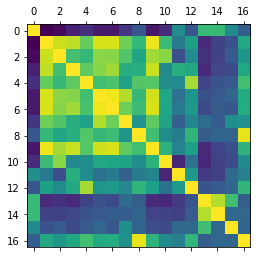

In [30]:
import matplotlib.pyplot as plt
    
plt.matshow(avocados_region.corr())